In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install required packages
!pip install imblearn tensorflow keras -q

# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


In [ ]:
# Set the path to your file (adjust the path based on your Drive structure)
file_path = "/content/drive/My Drive/numerical_creditcard.csv"

# Read the CSV file
data = pd.read_csv(file_path)

# Display first few rows
print(data.head())



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:

# Display first few rows to verify
print("First 5 rows of the dataset:\n", data.head())

# Check dataset shape
print("Dataset shape:", data.shape)

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Check data types
print("Data types:\n", data.info())


First 5 rows of the dataset:
    Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

  

KNN Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56777
           1       1.00      1.00      1.00     28518

    accuracy                           1.00     85295
   macro avg       1.00      1.00      1.00     85295
weighted avg       1.00      1.00      1.00     85295

KNN Confusion Matrix:
 [[56673   104]
 [    0 28518]]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
21324/21324 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.9840 - loss: 0.0488 - val_accuracy: 0.9983 - val_loss: 0.0066
Epoch 2/30
21324/21324 ━━━━━━━━━━━━━━━━━━━━ 90s 3ms/step - accuracy: 0.9983 - loss: 0.0065 - val_accuracy: 0.9933 - val_loss: 0.0234
Epoch 3/30
21324/21324 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.9988 - loss: 0.0051 - val_accuracy: 0.9987 - val_loss: 0.0056
Epoch 4/30
21324/21324 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 0.9989 - loss: 0.0039 - val_accuracy: 0.9993 - val_loss: 0.0032
Epoch 5/30
21324/21324 ━━━━━━━━━━━━━━━━━━━━ 83s 3ms/step - accuracy: 0.9992 - loss: 0.0032 - val_accuracy: 0.9985 - val_loss: 0.0061
Epoch 6/30
21324/21324 ━━━━━━━━━━━━━━━━━━━━ 90s 3ms/step - accuracy: 0.9993 - loss: 0.0030 - val_accuracy: 0.9992 - val_loss: 0.0036
Epoch 7/30
21324/21324 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9995 - val_loss: 0.0022
Epoch 8/30
21324/21324 ━━━━━━━━━━━━━━━━━━━━ 60s 3ms/step - accuracy: 

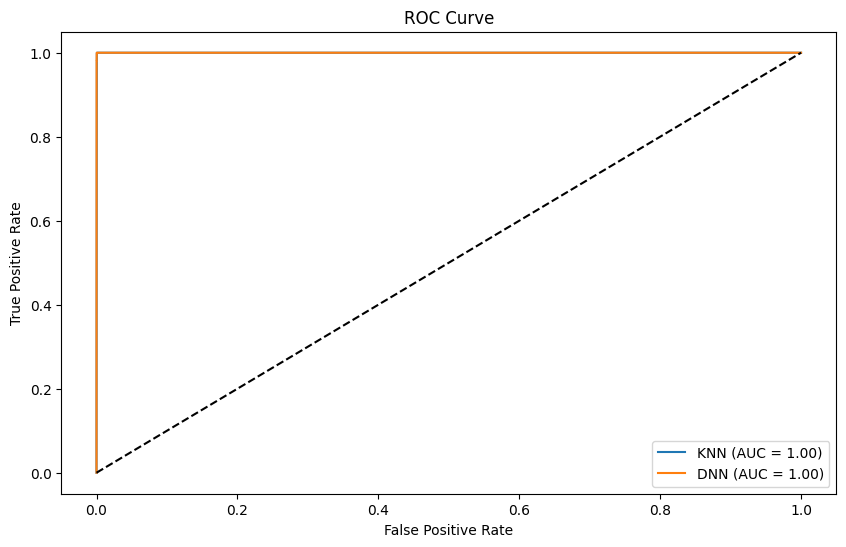

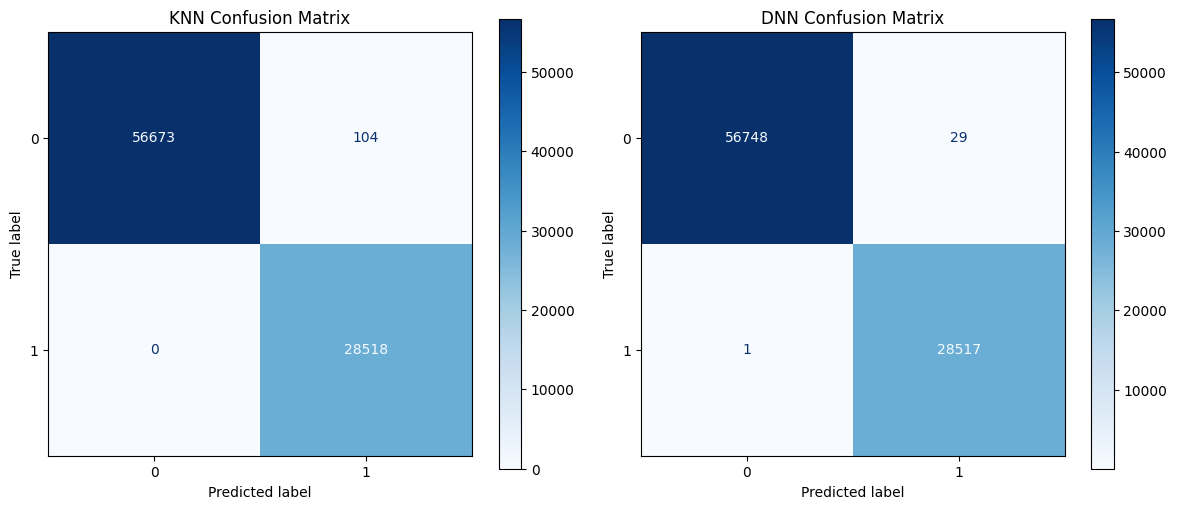

In [ ]:

# Since all columns are numerical, no need for categorical encoding
# Separate features and target
X = data.drop(columns=['Class'])
y = data['Class']

# Standardize the features (important for KNN and DNN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train and evaluate KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict and evaluate KNN
knn_preds = knn.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, knn_preds))
print("KNN Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))

# Build and train the DNN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# Train the DNN model
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test),
    epochs=30, batch_size=16, verbose=1, shuffle=True
)

# Evaluate the DNN model
dnn_preds = (model.predict(X_test) > 0.5).astype(int)
print("DNN Classification Report:\n", classification_report(y_test, dnn_preds))
print("DNN Confusion Matrix:\n", confusion_matrix(y_test, dnn_preds))

# Plot ROC curves for both models
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
dnn_fpr, dnn_tpr, _ = roc_curve(y_test, model.predict(X_test))

plt.figure(figsize=(10, 6))
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {auc(knn_fpr, knn_tpr):.2f})')
plt.plot(dnn_fpr, dnn_tpr, label=f'DNN (AUC = {auc(dnn_fpr, dnn_tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Plot confusion matrices
knn_cm = confusion_matrix(y_test, knn_preds)
dnn_cm = confusion_matrix(y_test, dnn_preds)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# KNN Confusion Matrix
ConfusionMatrixDisplay(knn_cm).plot(ax=axes[0], cmap='Blues')
axes[0].set_title('KNN Confusion Matrix')

# DNN Confusion Matrix
ConfusionMatrixDisplay(dnn_cm).plot(ax=axes[1], cmap='Blues')
axes[1].set_title('DNN Confusion Matrix')

plt.tight_layout()
plt.show()